In [136]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout, InputLayer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import *
from matplotlib import pyplot as plt
from tensorflow.keras.activations import relu, tanh
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
# Load MNIST data
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train/255.0
# x_test = x_test/255.0

df = pd.read_csv('data.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)

In [132]:
# X = df.iloc[:, :-1]
# X = X.to_numpy()
# y = df.iloc[:, -1]
# y = y.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.to_numpy()
train_size = round(X.shape[0]/10)*8 + 1
X_train = X[:train_size]
X_val = X[train_size:]

In [20]:
# X_train.to_csv("x_train.csv", header=False, index=False)
# y_train.to_csv("y_train.csv", header=False, index=False)
# X_test.to_csv("x_test.csv", header=False, index=False)
# y_test.to_csv("y_test.csv", header=False, index=False)

In [139]:
candidate = [10, 8, 8, 6, 6, 8, 8, 10, 4]

In [140]:
latent_size = candidate[-1]
input_layers = candidate[:4]
output_layers = candidate[4:-1]
output_size = X.shape[1]
# input_size = (13,)
input_size = X.shape[1]


In [141]:
# encoder = Sequential()
# encoder.add(InputLayer(input_shape=input_size))
# for nodes in input_layers:
#     encoder.add(Dense(nodes, activation='tanh'))
# encoder.add(Dense(latent_size, activation='tanh'))

visible = Input(shape=(input_size,))
e = visible
for nodes in input_layers:
    e = Dense(nodes)(e)
    e = tanh(e)

bottleneck = Dense(latent_size)(e)
d = bottleneck
for nodes in output_layers:
    d = Dense(nodes)(d)
    d = tanh(d)

output = Dense(output_size, activation='linear')(d)
model = Model(inputs=visible, outputs=output)

In [142]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 14)]              0         
                                                                 
 dense_84 (Dense)            (None, 10)                150       
                                                                 
 tf.math.tanh_52 (TFOpLambda  (None, 10)               0         
 )                                                               
                                                                 
 dense_85 (Dense)            (None, 8)                 88        
                                                                 
 tf.math.tanh_53 (TFOpLambda  (None, 8)                0         
 )                                                               
                                                                 
 dense_86 (Dense)            (None, 8)                 72  

In [157]:
model.compile(optimizer='adam', metrics= [keras.metrics.Accuracy()], loss = MeanAbsolutePercentageError())

In [144]:
# encoder.summary()

In [145]:
# decoder = Sequential()
# decoder.add(InputLayer(input_shape=(latent_size,)))
# for nodes in output_layers:
#     decoder.add(Dense(nodes, activation='tanh'))
# decoder.add(Dense(output_size, activation='tanh'))

In [146]:
# decoder.summary()

In [147]:
# encoder = Sequential([
#     Flatten(input_shape = (28, 28)),
#     Dense(512),
#     LR(),
#     Dropout(0.5),
#     Dense(256),
#     LR(),
#     Dropout(0.5),
#     Dense(128),
#     LR(),
#     Dropout(0.5),
#     Dense(64),
#     LR(),
#     Dropout(0.5),
#     Dense(LATENT_SIZE),
#     LR()
# ])

In [148]:
# decoder = Sequential([
#     Dense(64, input_shape = (LATENT_SIZE,)),
#     LR(),
#     Dropout(0.5),
#     Dense(128),
#     LR(),
#     Dropout(0.5),
#     Dense(256),
#     LR(),
#     Dropout(0.5),
#     Dense(512),
#     LR(),
#     Dropout(0.5),
#     Dense(784),
#     Activation("sigmoid"),
#     Reshape((28, 28))
# ])

In [149]:
# inp = Input(shape = input_size)
# latent_vector = encoder(inp)
# output = decoder(latent_vector)
# model = Model(inputs = inp, outputs = output)
# model.compile("nadam", metrics= [keras.metrics.Accuracy()], loss = MeanAbsolutePercentageError())

In [150]:
# model.summary()

In [158]:
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_val,X_val))

Epoch 1/100
417/417 - 4s - loss: 51.1841 - accuracy: 0.0000e+00 - val_loss: 57.3776 - val_accuracy: 0.0000e+00 - 4s/epoch - 9ms/step
Epoch 2/100
417/417 - 1s - loss: 50.1288 - accuracy: 0.0000e+00 - val_loss: 49.3116 - val_accuracy: 0.0000e+00 - 963ms/epoch - 2ms/step
Epoch 3/100
417/417 - 1s - loss: 50.8296 - accuracy: 0.0000e+00 - val_loss: 49.5321 - val_accuracy: 0.0000e+00 - 903ms/epoch - 2ms/step
Epoch 4/100
417/417 - 1s - loss: 51.4487 - accuracy: 0.0000e+00 - val_loss: 50.9383 - val_accuracy: 0.0000e+00 - 953ms/epoch - 2ms/step
Epoch 5/100


KeyboardInterrupt: 

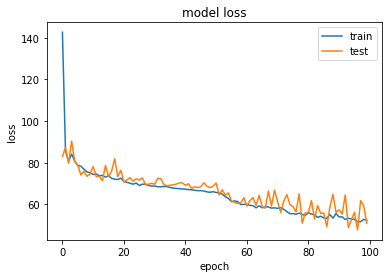

In [152]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

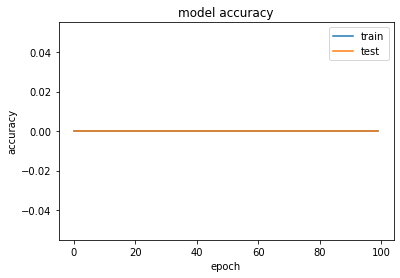

In [154]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [155]:
X_train[0:5]

array([[7.0000e-01, 9.0417e+02, 6.9641e+02, 8.3890e+01, 6.6000e+02,
        3.3800e+02, 9.2000e+02, 3.0000e-01, 2.9000e-03, 7.0000e-02,
        7.0000e-03, 1.0000e-03, 6.2000e-02, 1.6600e+02],
       [7.0000e-01, 9.1300e+02, 7.0120e+02, 8.3890e+01, 6.6000e+02,
        3.3600e+02, 8.1000e+02, 3.0000e-01, 2.9000e-03, 7.0000e-02,
        7.0000e-03, 1.0000e-03, 6.2000e-02, 1.7700e+02],
       [7.0000e-01, 9.0620e+02, 6.9752e+02, 8.3890e+01, 6.6000e+02,
        3.3700e+02, 9.0000e+02, 3.0000e-01, 1.9000e-03, 6.0000e-02,
        6.0000e-03, 1.0000e-03, 6.1000e-02, 1.6900e+02],
       [7.0000e-01, 9.0314e+02, 7.0092e+02, 8.1880e+01, 6.7000e+02,
        4.2800e+02, 9.0000e+02, 3.0000e-01, 3.4000e-03, 7.0000e-02,
        8.0000e-03, 1.0000e-03, 6.4000e-02, 1.7900e+02],
       [7.0000e-01, 9.1092e+02, 7.0210e+02, 8.1880e+01, 6.6000e+02,
        3.3600e+02, 8.1000e+02, 3.0000e-01, 2.5000e-03, 7.0000e-02,
        8.0000e-03, 1.0000e-03, 6.9000e-02, 1.8000e+02]])

In [156]:
model(X_train[0:5], training=False)

<tf.Tensor: shape=(5, 14), dtype=float32, numpy=
array([[7.0780528e-01, 2.1835519e+02, 2.1791617e+02, 7.2497841e+01,
        2.1764725e+02, 2.1357547e+02, 2.0102115e+02, 3.1310156e-01,
        2.3633577e-03, 7.4444309e-02, 5.4961387e-03, 5.7243177e-04,
        5.2079849e-04, 1.6843246e+02],
       [7.0780528e-01, 2.1835519e+02, 2.1791617e+02, 7.2497841e+01,
        2.1764725e+02, 2.1357547e+02, 2.0102115e+02, 3.1310156e-01,
        2.3633577e-03, 7.4444309e-02, 5.4961387e-03, 5.7243177e-04,
        5.2079849e-04, 1.6843246e+02],
       [7.0780528e-01, 2.1835519e+02, 2.1791617e+02, 7.2497841e+01,
        2.1764725e+02, 2.1357547e+02, 2.0102115e+02, 3.1310156e-01,
        2.3633577e-03, 7.4444309e-02, 5.4961387e-03, 5.7243177e-04,
        5.2079849e-04, 1.6843246e+02],
       [7.0780528e-01, 2.1835519e+02, 2.1791617e+02, 7.2497841e+01,
        2.1764725e+02, 2.1357547e+02, 2.0102115e+02, 3.1310156e-01,
        2.3633577e-03, 7.4444309e-02, 5.4961387e-03, 5.7243177e-04,
        5.2079849e